In [112]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
import scipy.stats as ss
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score

In [72]:
warnings.filterwarnings('ignore')

In [73]:
hous=pd.read_csv('C:\\Users\\Dell\\OneDrive\\Desktop\\Project-Housing_splitted\\train.csv')

In [74]:
hous.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


# Exploratory Data Analysis

In [75]:
hous.shape

(1168, 81)

In [76]:
# Getting Information about the data
hous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [77]:
hous.drop(['Alley','Fence','MiscVal','PoolQC','MiscFeature'],axis=1,inplace=True) #dropping the columns with exceptionally less values

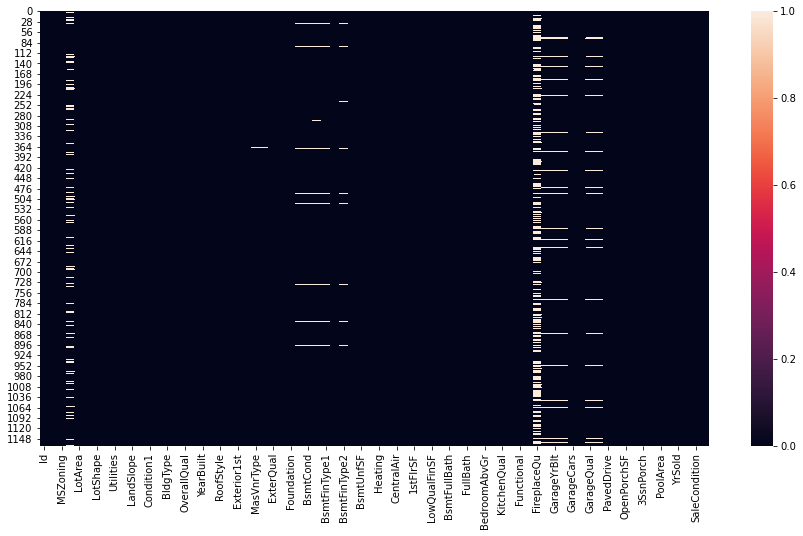

In [78]:
plt.figure(figsize=(15,8))
sns.heatmap(hous.isnull())
plt.show()

In [79]:
hous.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168,954.00000,1168.000000,1168,1168,1168,1168,1168,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168,1168,1168.000000
unique,NaN,NaN,5,NaN,NaN,2,4,4,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,928,NaN,NaN,1164,740,1046,1168,842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999,945,NaN
mean,724.136130,56.767979,NaN,70.98847,10484.749144,NaN,NaN,NaN,NaN,NaN,...,46.559932,23.015411,3.639555,15.051370,3.448630,6.344178,2007.804795,NaN,NaN,181477.005993
std,416.159877,41.940650,NaN,24.82875,8957.442311,NaN,NaN,NaN,NaN,NaN,...,66.381023,63.191089,29.088867,55.080816,44.896939,2.686352,1.329738,NaN,NaN,79105.586863
min,1.000000,20.000000,NaN,21.00000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,360.500000,20.000000,NaN,60.00000,7621.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,NaN,NaN,130375.000000
50%,714.500000,50.000000,NaN,70.00000,9522.500000,NaN,NaN,NaN,NaN,NaN,...,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN,163995.000000
75%,1079.500000,70.000000,NaN,80.00000,11515.500000,NaN,NaN,NaN,NaN,NaN,...,70.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN,215000.000000


In [80]:
hous['FireplaceQu'].describe()

count     617
unique      5
top        Gd
freq      301
Name: FireplaceQu, dtype: object

In [81]:
hous['LotFrontage']=hous['LotFrontage'].fillna(np.mean(hous['LotFrontage']))
hous['FireplaceQu']=hous['FireplaceQu'].fillna(ss.mode(hous['FireplaceQu'])[0][0])

In [82]:
hous=hous.dropna()

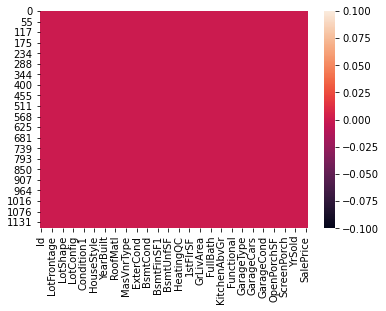

In [83]:
sns.heatmap(hous.isnull())
plt.show()

We have handled  null values


In [84]:
hous.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,...,205,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,...,207,0,0,224,0,10,2007,WD,Normal,268000
2,793,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,130,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,...,122,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,6,2009,WD,Normal,215000


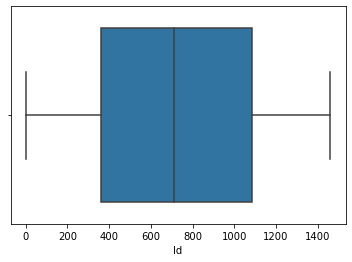

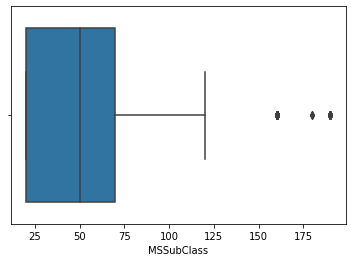

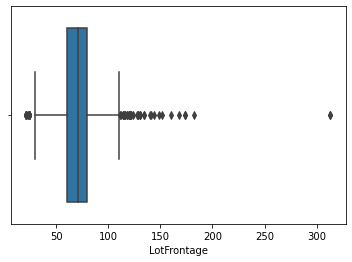

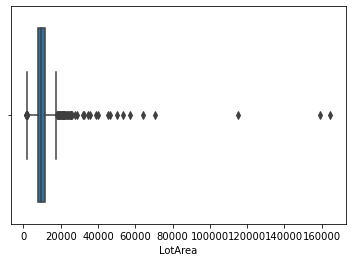

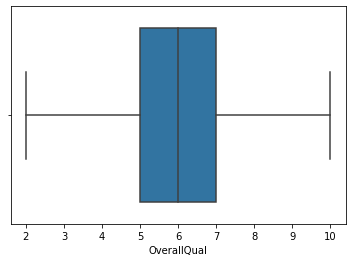

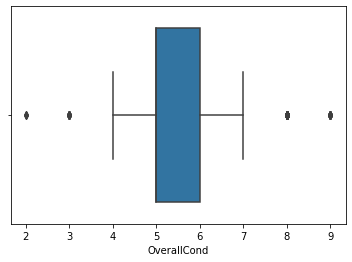

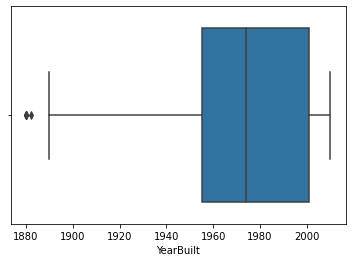

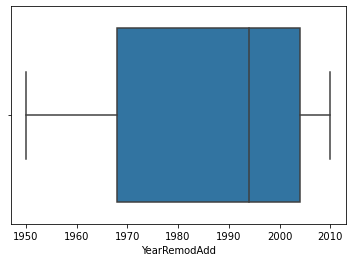

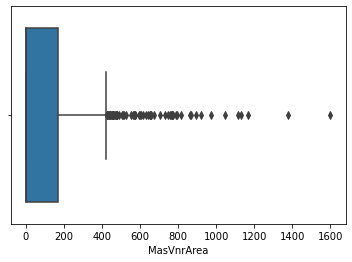

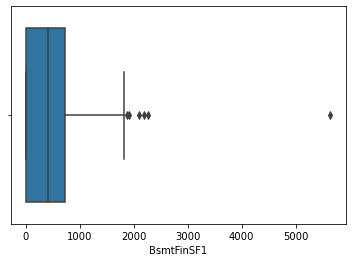

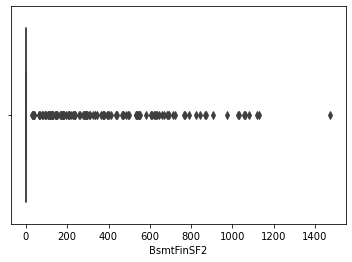

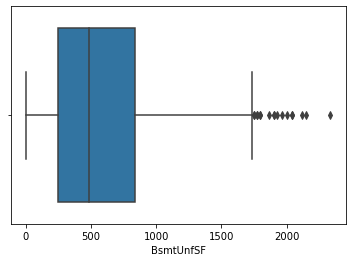

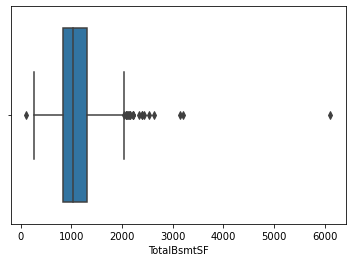

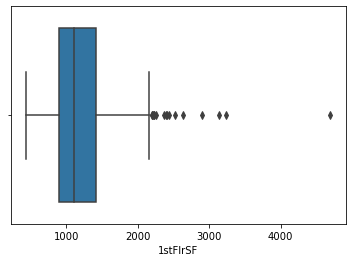

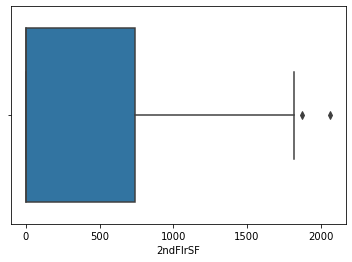

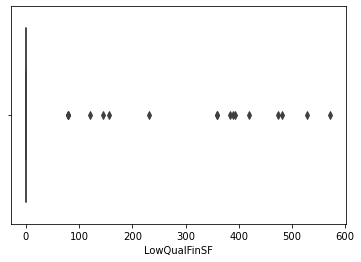

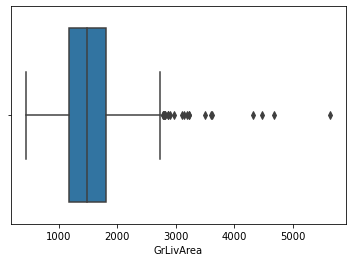

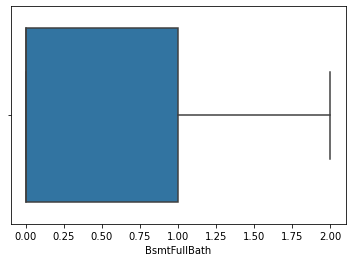

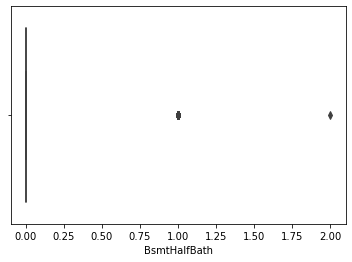

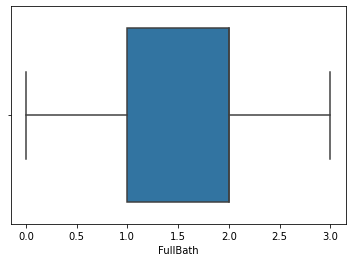

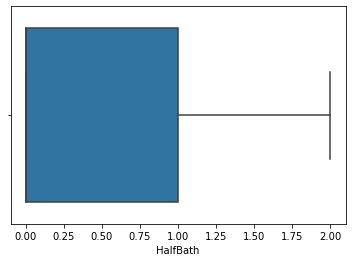

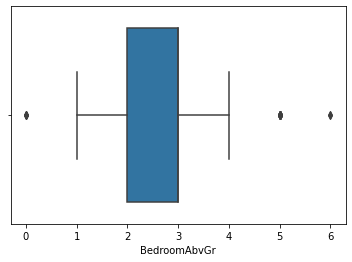

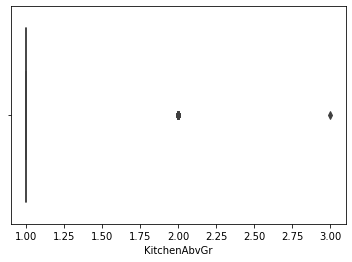

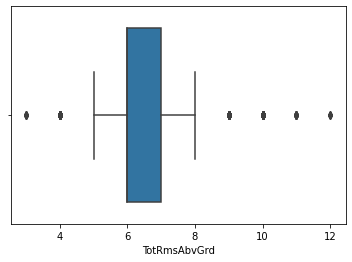

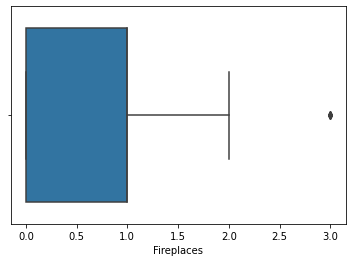

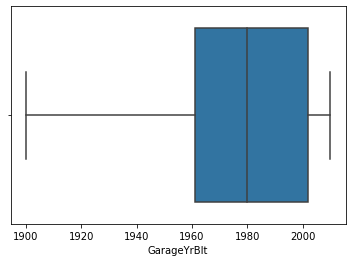

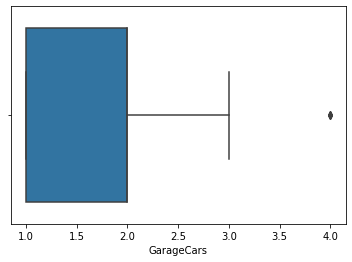

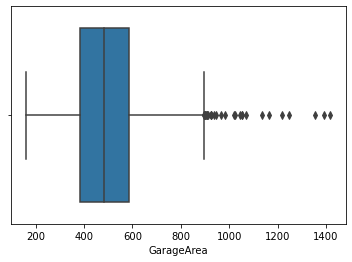

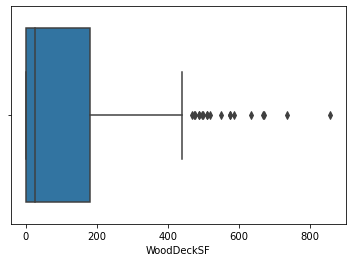

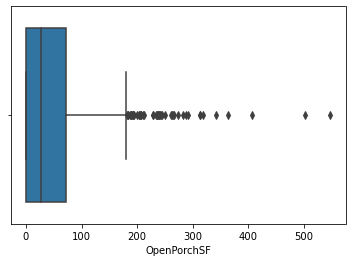

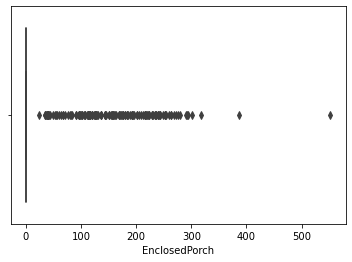

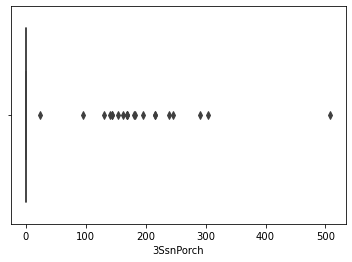

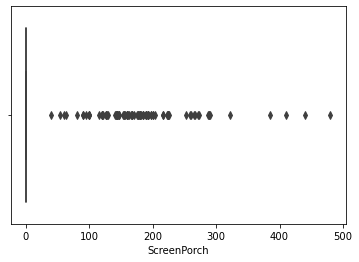

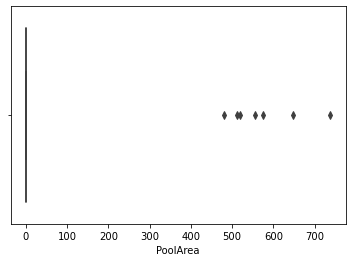

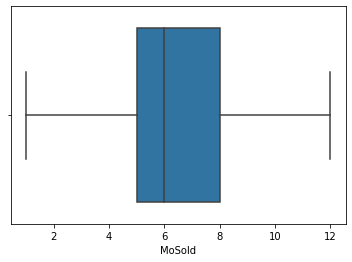

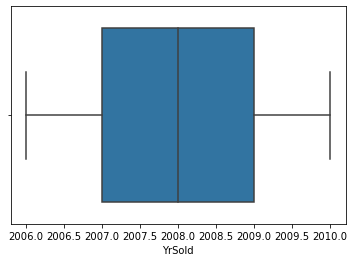

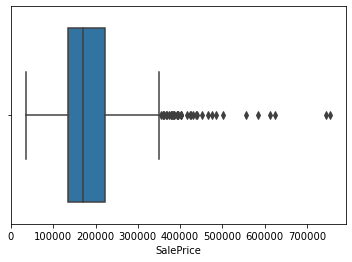

In [15]:
for i in hous.columns:
    if hous[i].dtype=='int64' or hous[i].dtype==float:
        sns.boxplot(hous[i])
        plt.show()

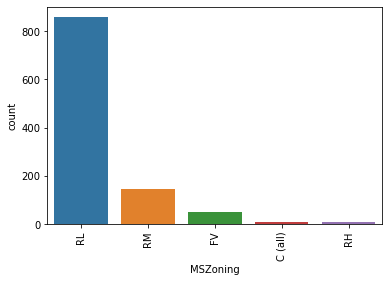

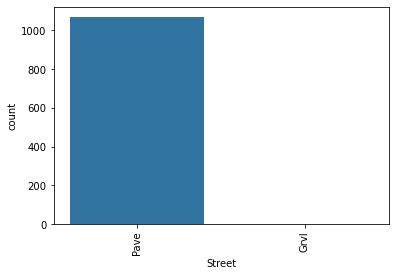

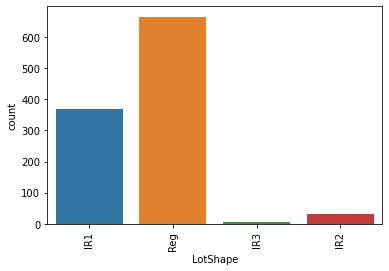

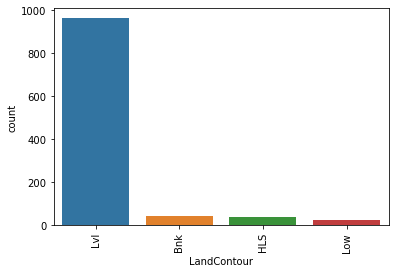

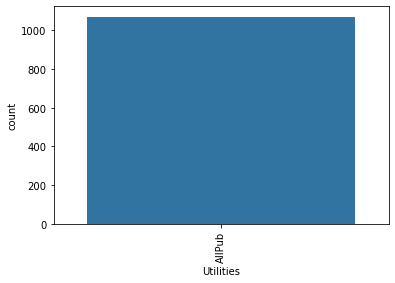

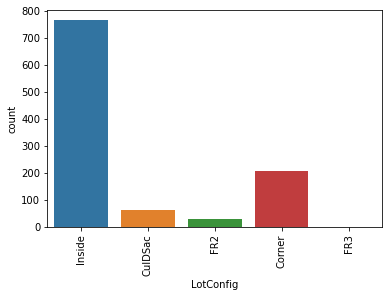

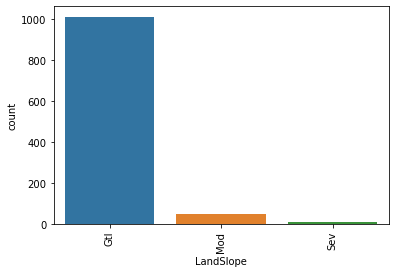

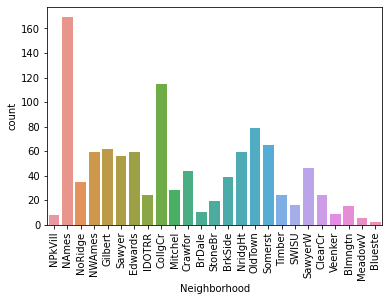

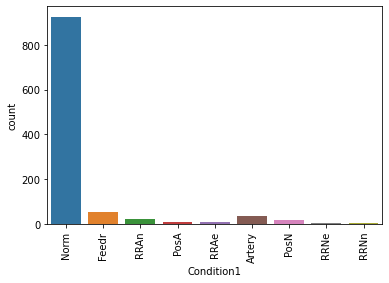

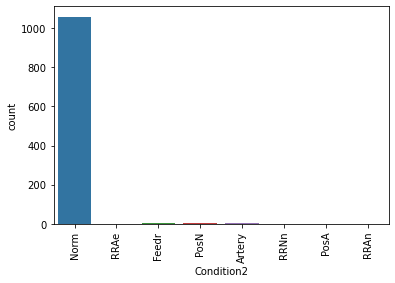

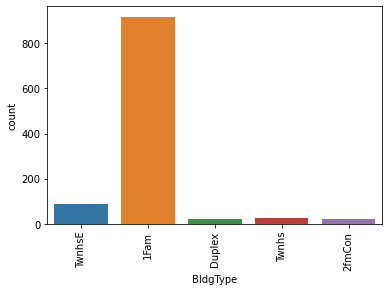

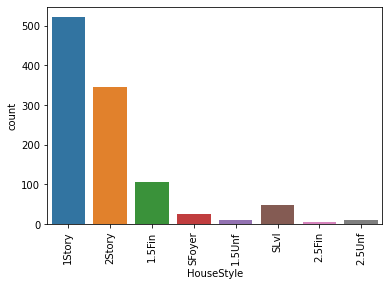

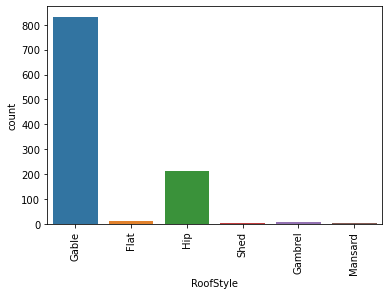

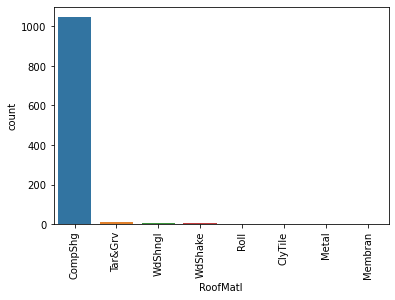

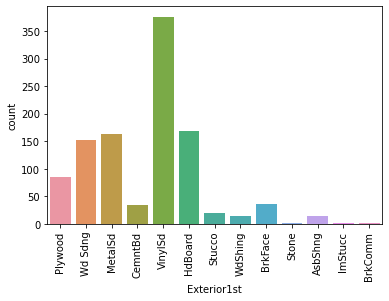

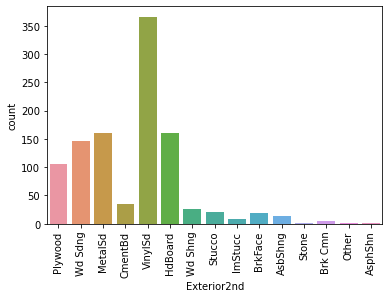

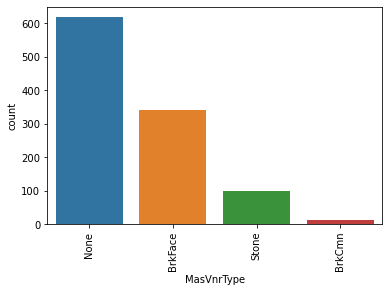

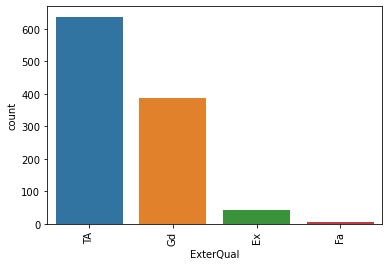

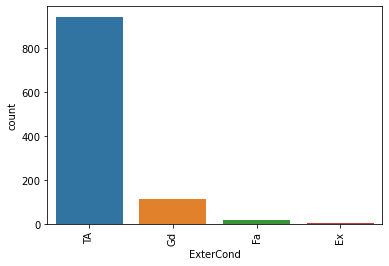

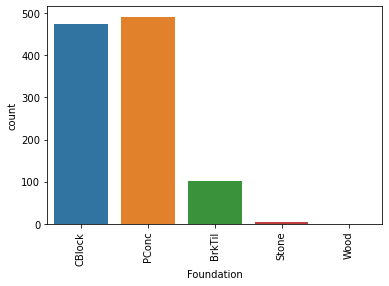

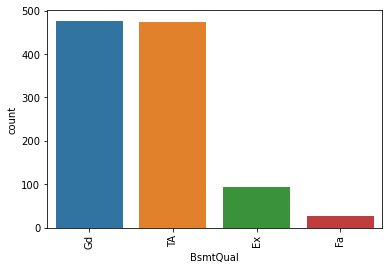

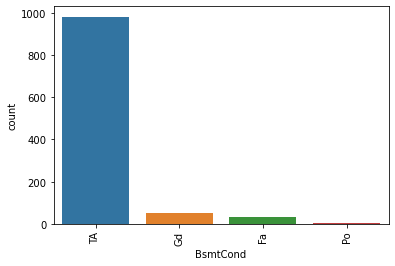

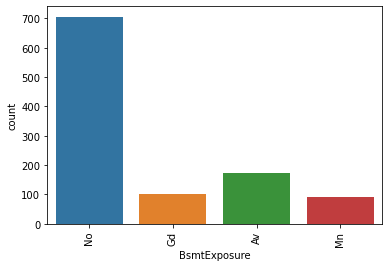

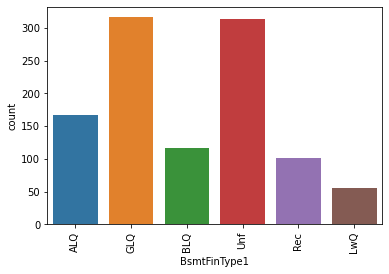

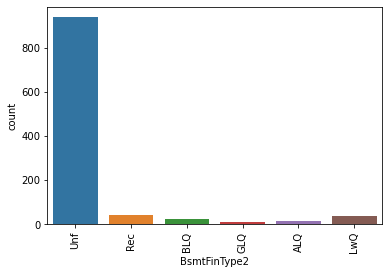

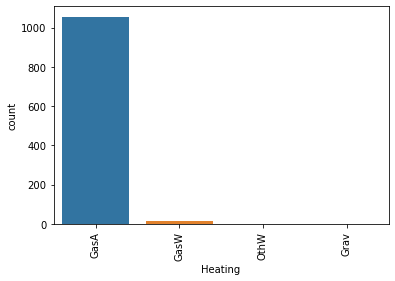

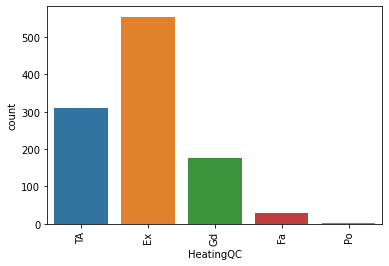

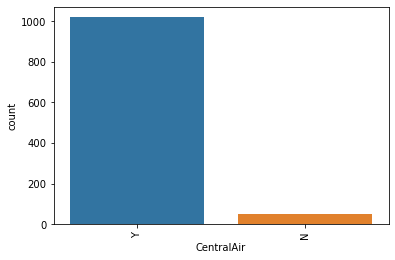

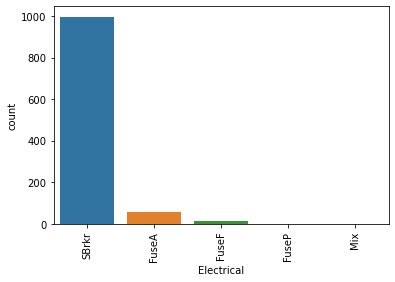

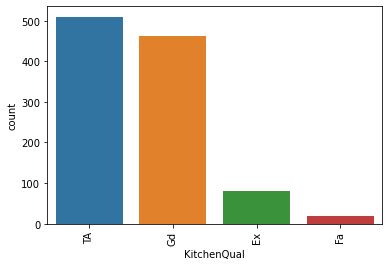

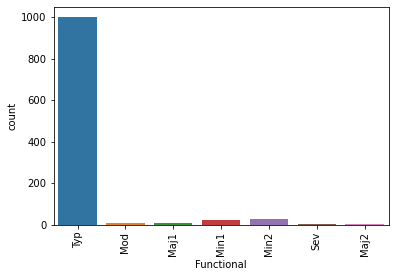

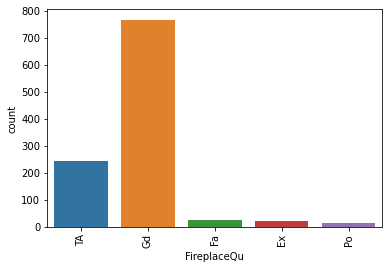

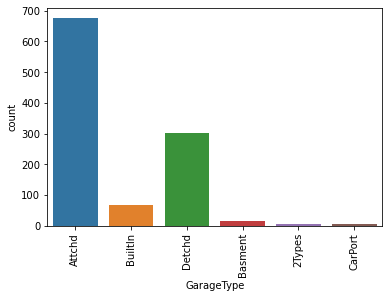

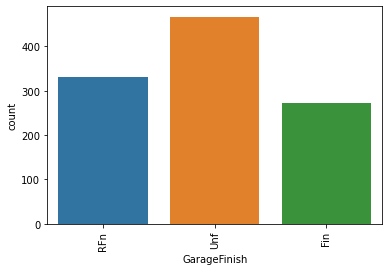

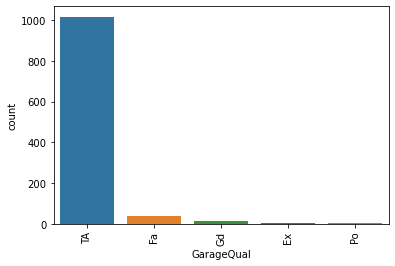

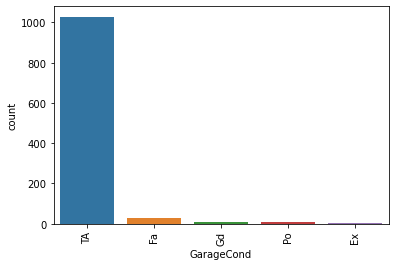

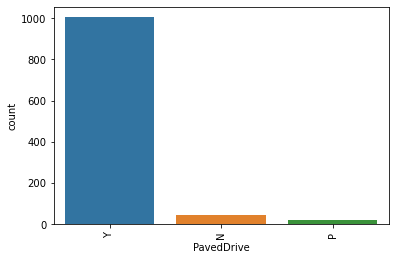

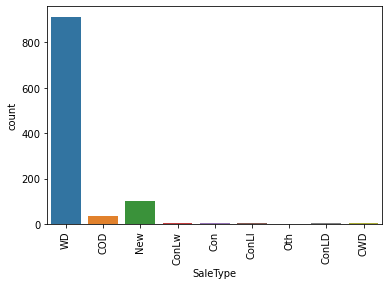

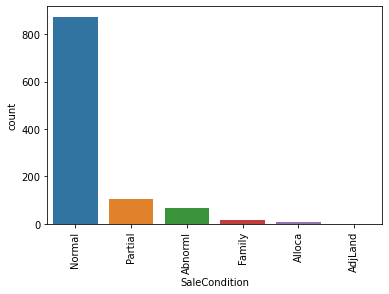

In [16]:
for i in hous.columns:
    if hous[i].dtype=='O':
        sns.countplot(hous[i])
        plt.xticks(rotation=90)
        plt.show()

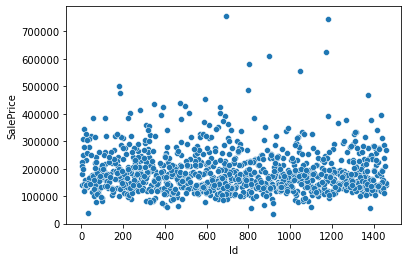

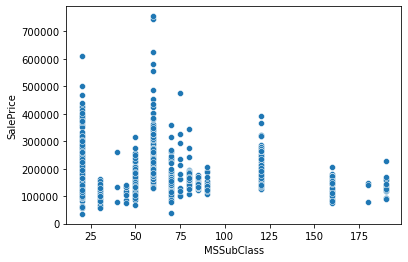

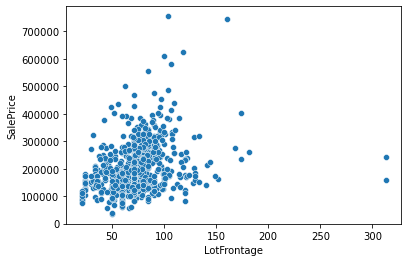

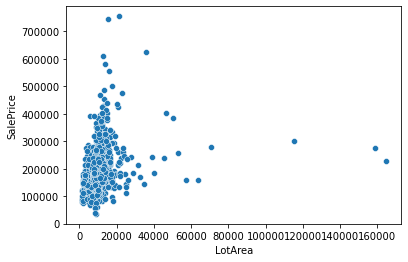

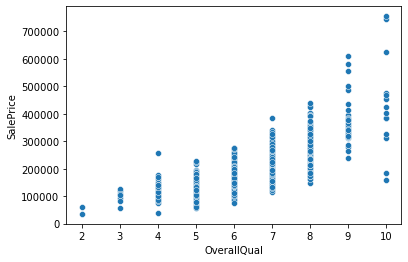

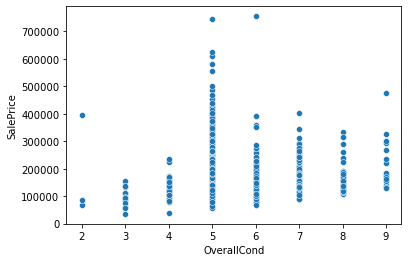

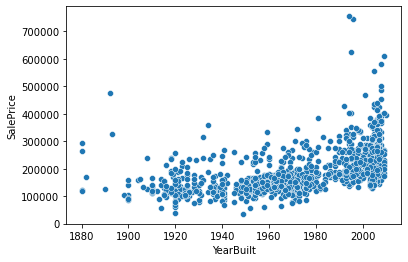

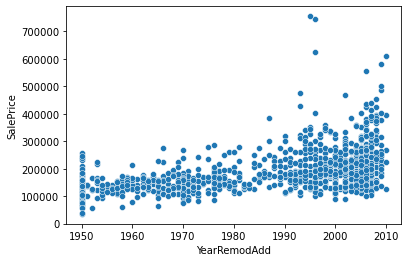

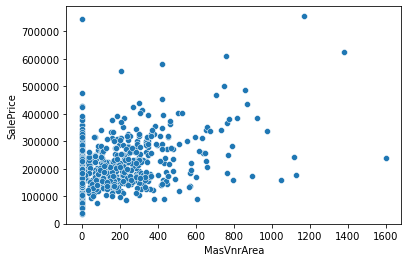

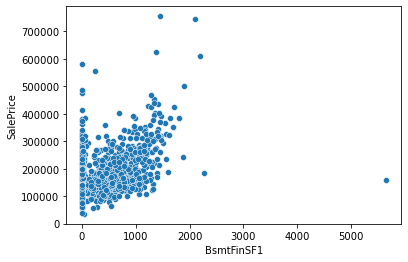

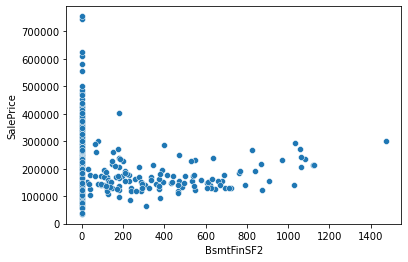

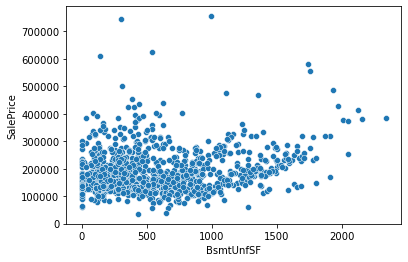

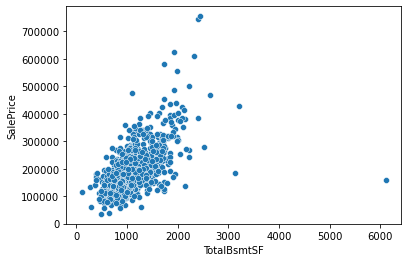

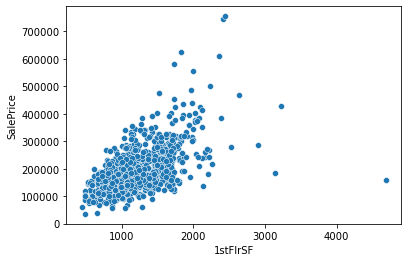

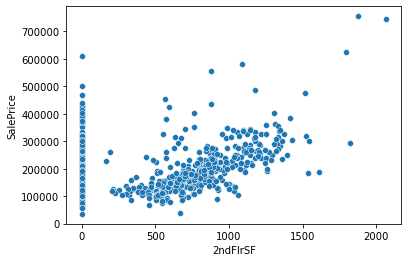

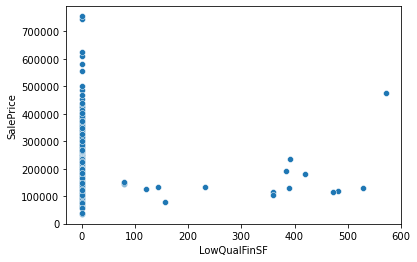

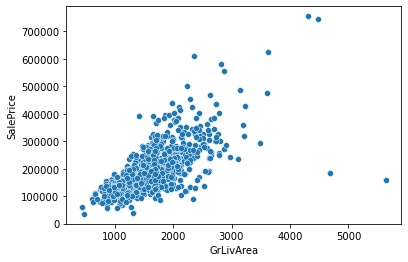

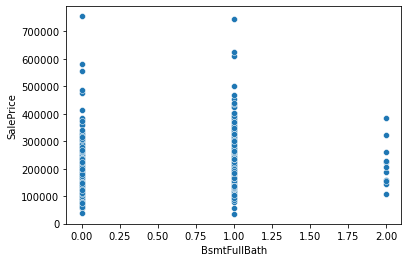

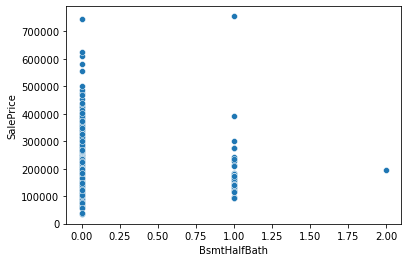

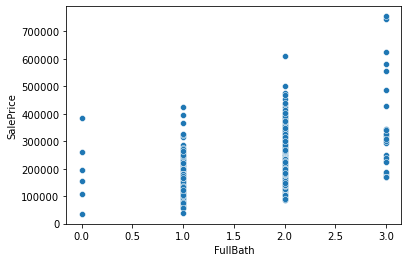

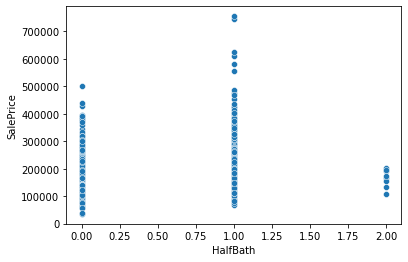

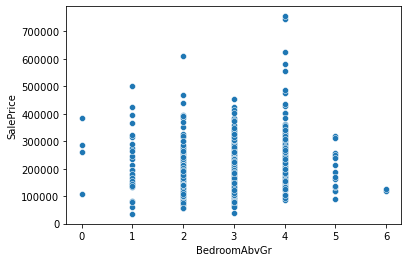

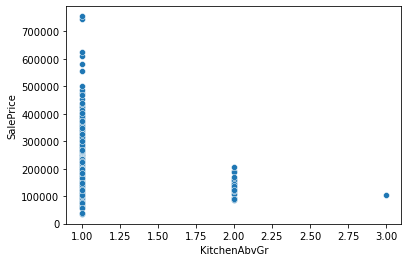

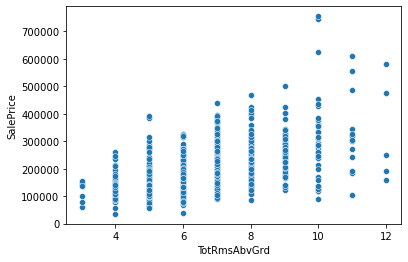

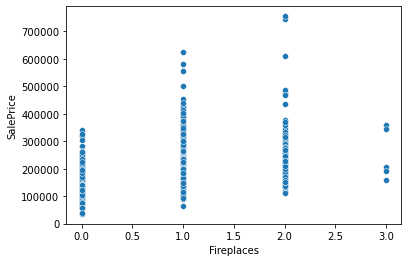

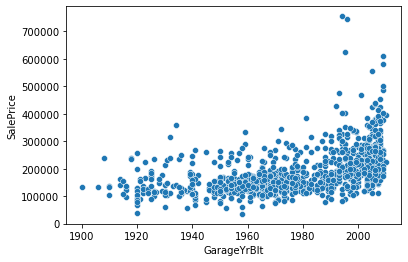

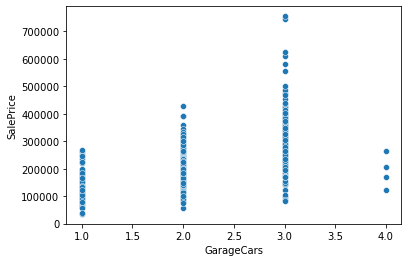

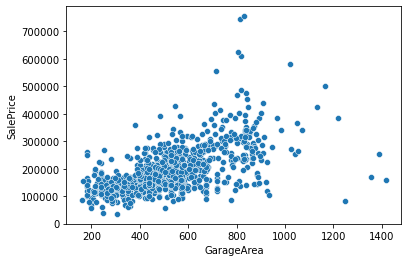

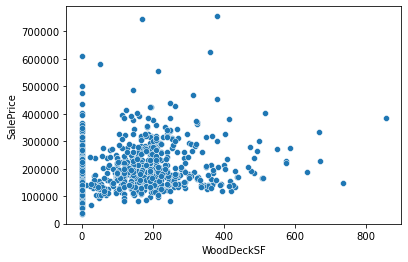

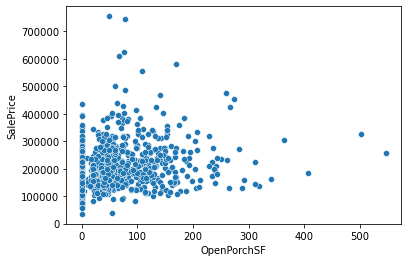

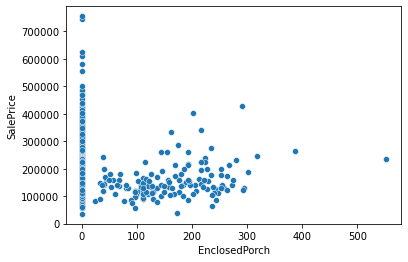

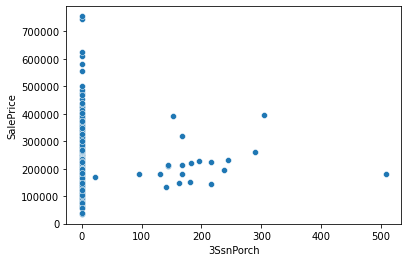

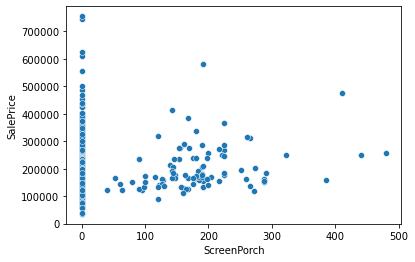

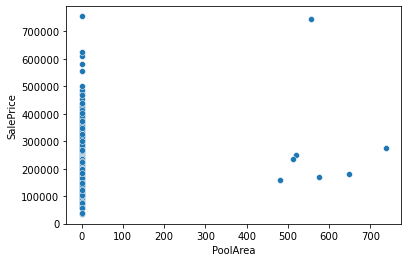

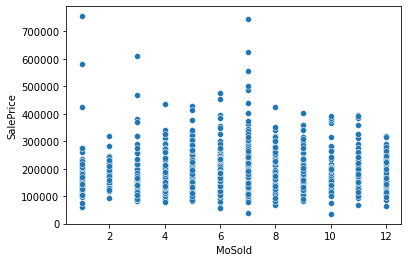

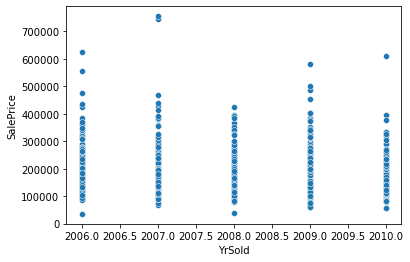

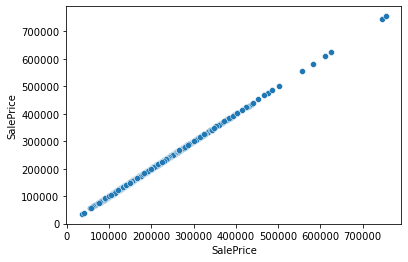

In [17]:
for i in hous.columns:
    if hous[i].dtype=='int64' or hous[i].dtype==float:
        sns.scatterplot(hous[i],hous['SalePrice'])
        plt.show()

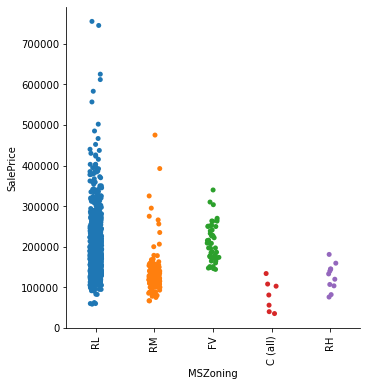

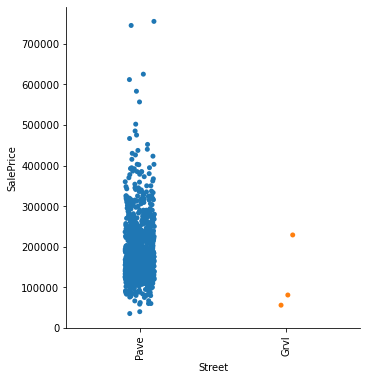

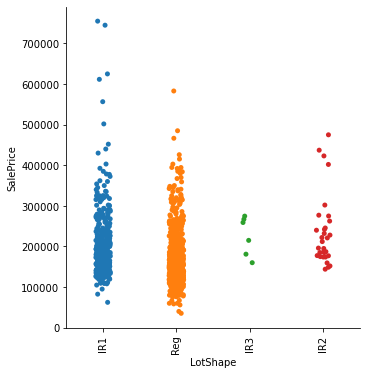

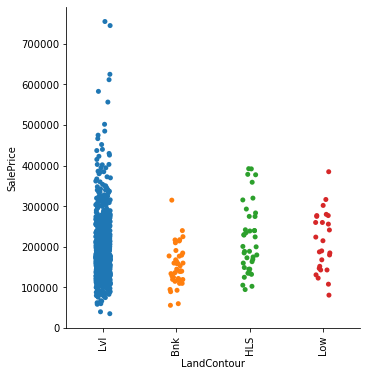

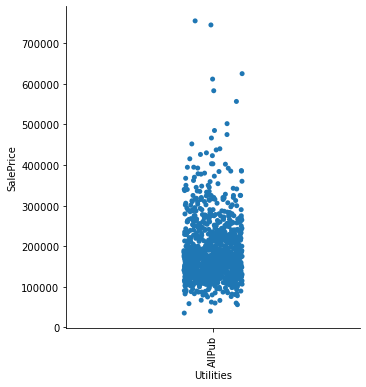

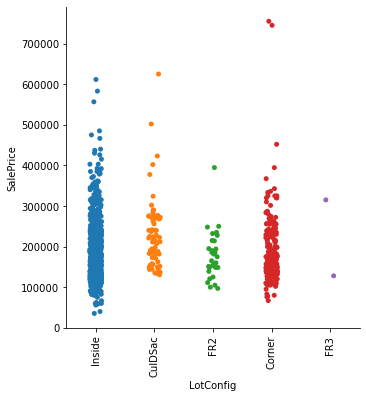

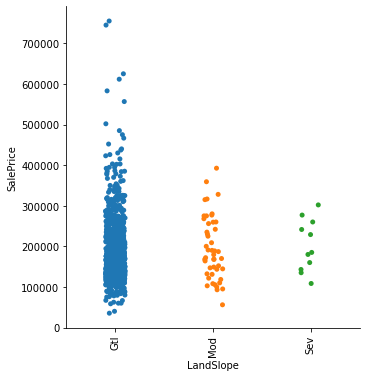

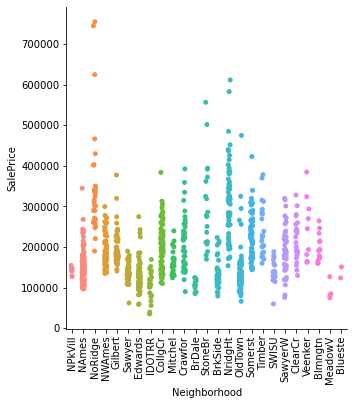

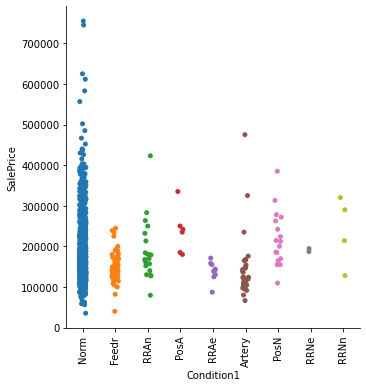

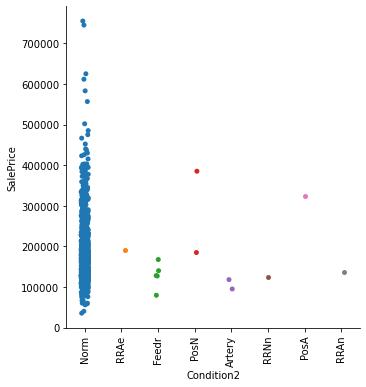

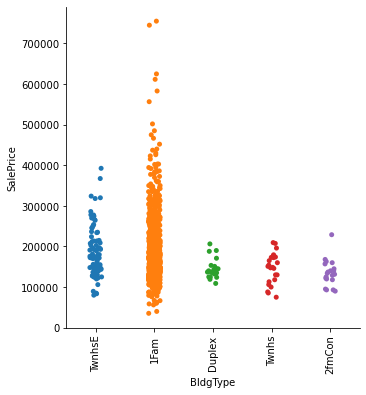

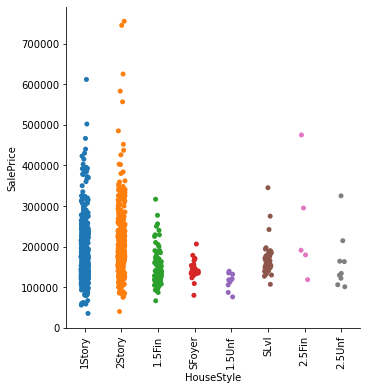

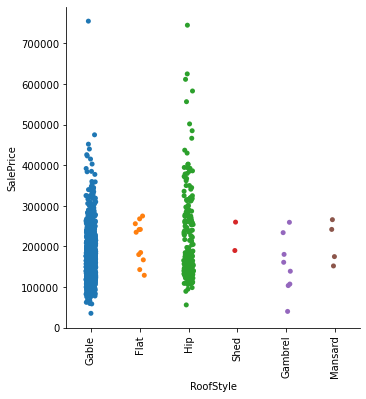

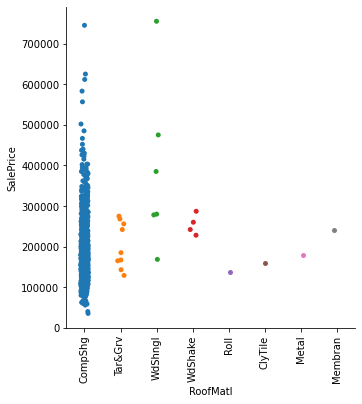

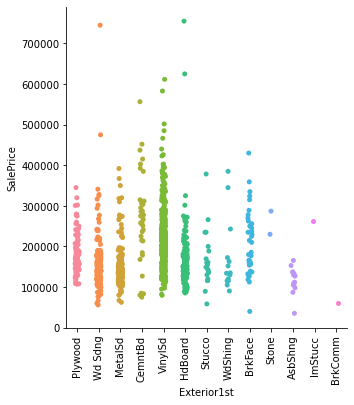

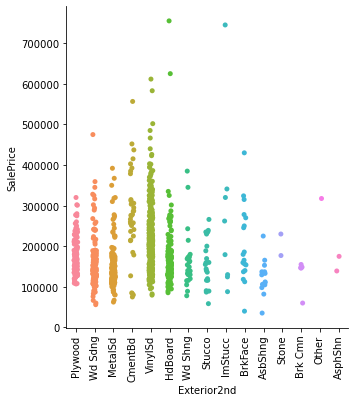

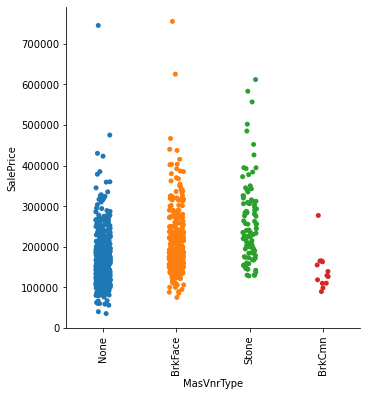

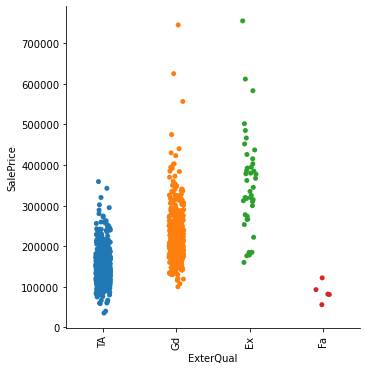

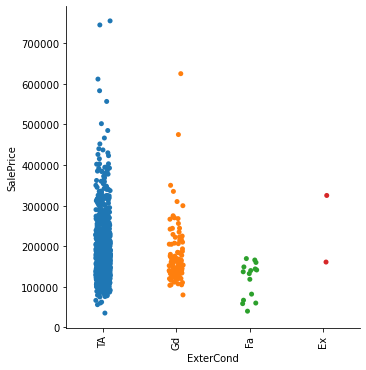

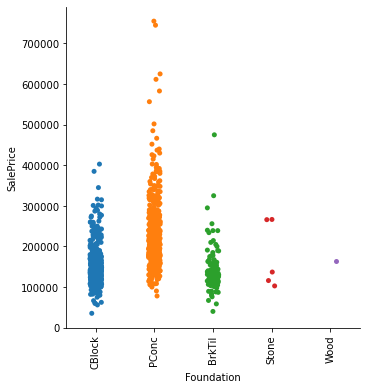

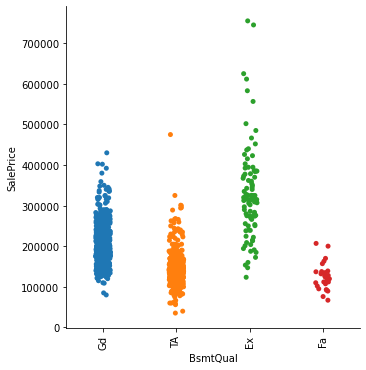

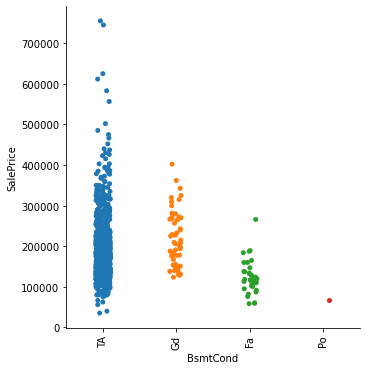

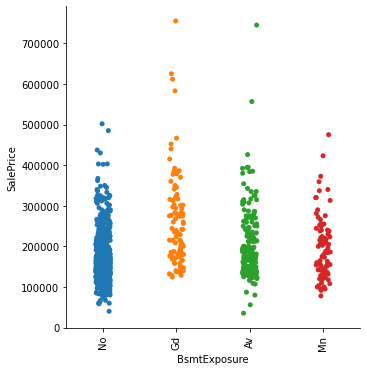

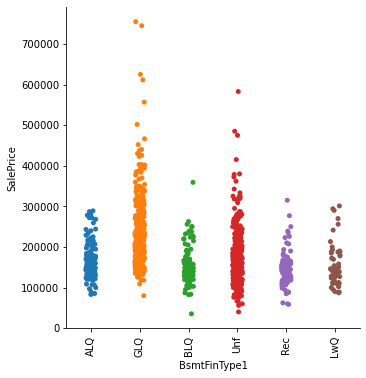

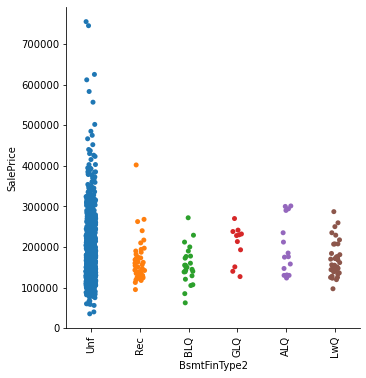

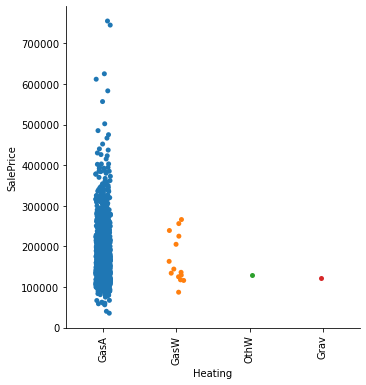

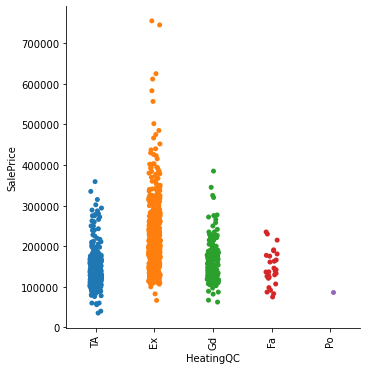

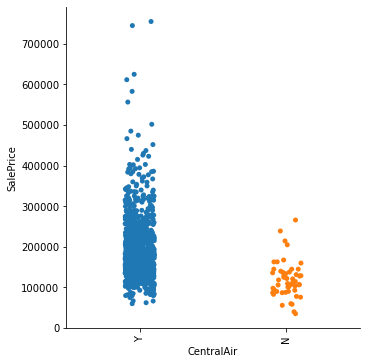

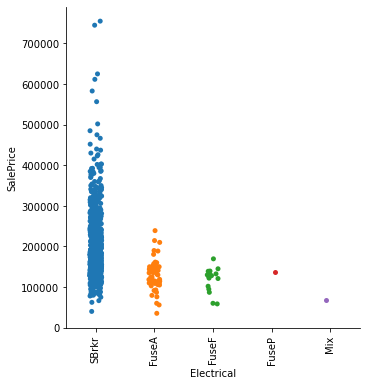

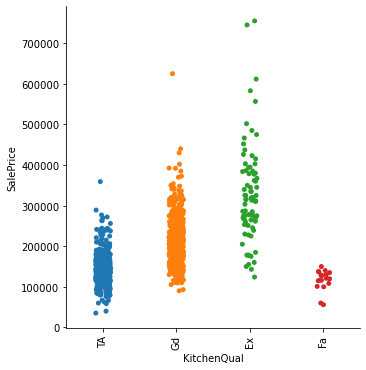

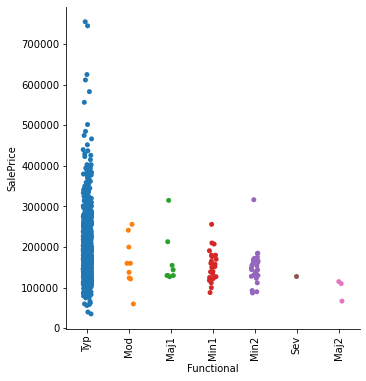

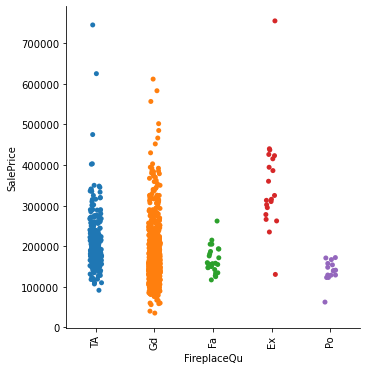

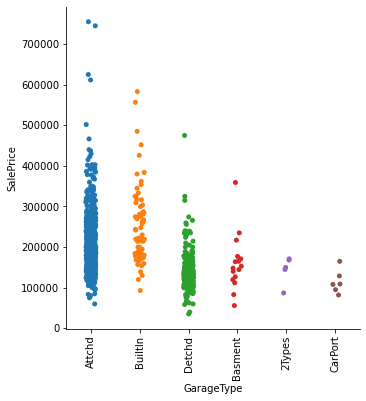

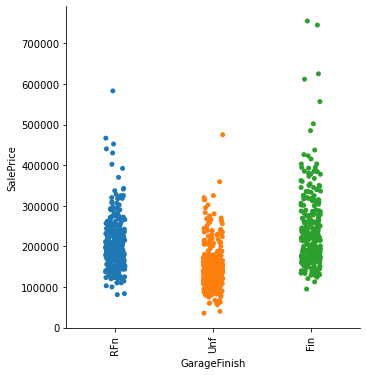

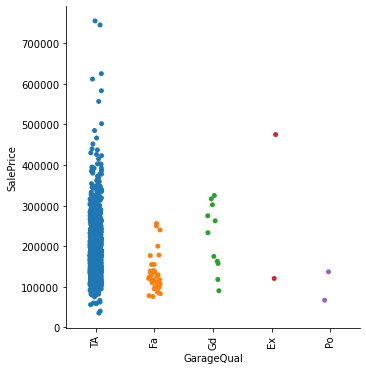

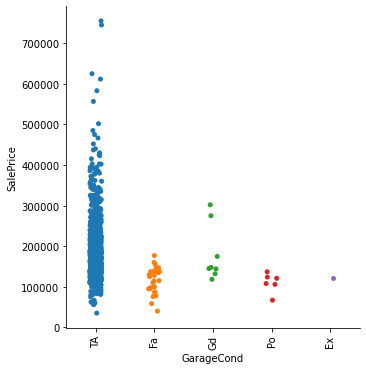

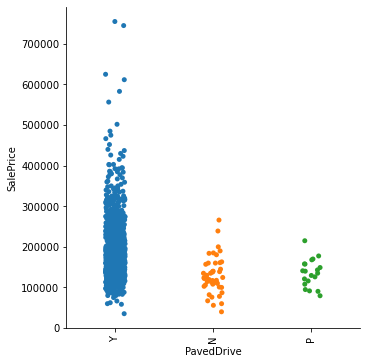

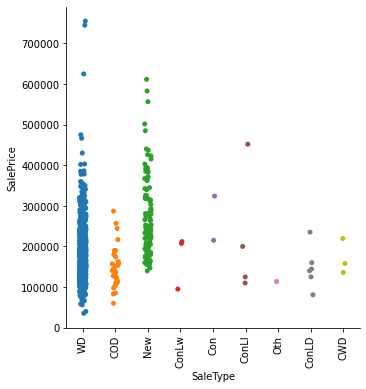

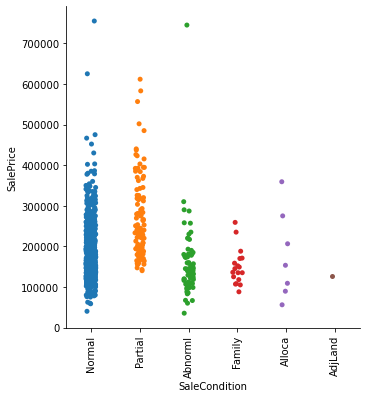

In [18]:
for i in hous.columns:
    if hous[i].dtype=='O':
        sns.catplot(x=i,y='SalePrice',data=hous)
        plt.xticks(rotation=90)
        plt.show()

**Encoding the categorical variables**

In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in hous.columns:
    if hous[i].dtype==object:
        hous[i]=le.fit_transform((hous[i].astype(str)))

**Correlation**

In [91]:
hous.corr()['SalePrice'].sort_values()

ExterQual      -0.635005
BsmtQual       -0.620666
KitchenQual    -0.617747
GarageFinish   -0.506917
HeatingQC      -0.409670
                  ...   
GarageCars      0.620355
GrLivArea       0.708010
OverallQual     0.778769
SalePrice       1.000000
Utilities            NaN
Name: SalePrice, Length: 76, dtype: float64

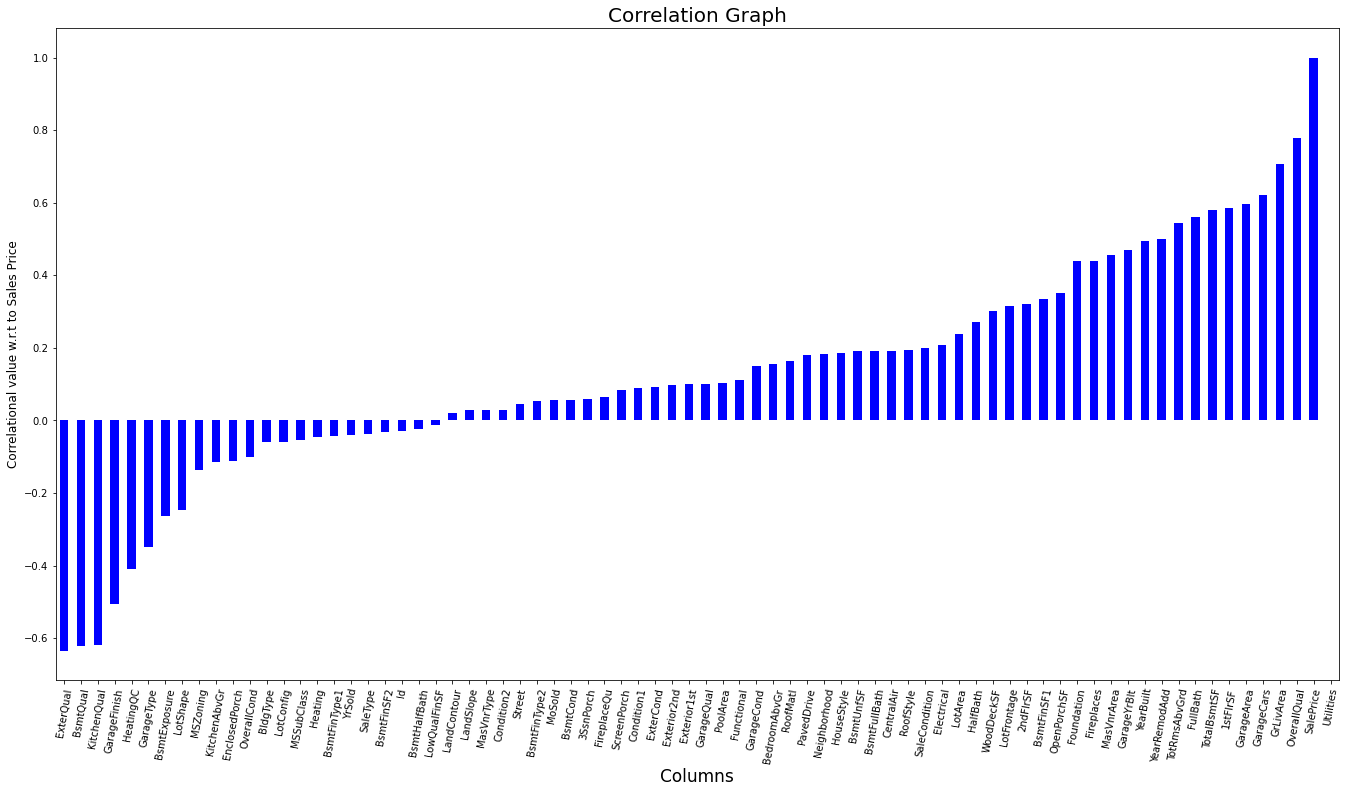

In [97]:
plt.figure(figsize=(23,12))
hous.corr()['SalePrice'].sort_values().plot(kind='bar',color='blue')
plt.title('Correlation Graph',size=20)
plt.ylabel('Correlational value w.r.t to Sales Price',size=12)
plt.xlabel('Columns',size=17)
plt.xticks(rotation=80)
plt.show()

**Splitting the data into features and vectors**

In [102]:
x=hous.drop(['SalePrice','Id'],axis=1)
y=hous['SalePrice']

# Model Building

In [103]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
lr=LinearRegression()

In [108]:
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    print(f'at {i} the training accuracy is {r2_score(pred_train,ytrain)}')
    print(f'at {i} the test accuracy is {r2_score(pred_test,ytest)}')
    print('\n')

at 0 the training accuracy is 0.7780808819889841
at 0 the test accuracy is 0.7242050126412414


at 1 the training accuracy is 0.809184753086114
at 1 the test accuracy is 0.7444380597818838


at 2 the training accuracy is 0.850260356735115
at 2 the test accuracy is 0.5959927100575632


at 3 the training accuracy is 0.7863985524332927
at 3 the test accuracy is 0.7047947440493059


at 4 the training accuracy is 0.789793845113572
at 4 the test accuracy is 0.6943488697855562


at 5 the training accuracy is 0.7740297396672147
at 5 the test accuracy is 0.8320144639735646


at 6 the training accuracy is 0.8884705743599449
at 6 the test accuracy is 0.5437037692428748


at 7 the training accuracy is 0.7576194143513018
at 7 the test accuracy is 0.8416428089677302


at 8 the training accuracy is 0.8396504855536729
at 8 the test accuracy is 0.638719124157785


at 9 the training accuracy is 0.7996983758304939
at 9 the test accuracy is 0.6799138225258181


at 10 the training accuracy is 0.82819611963

at 85 the test accuracy is 0.7832493909523561


at 86 the training accuracy is 0.7859914674963188
at 86 the test accuracy is 0.6469851968056433


at 87 the training accuracy is 0.7736882803044856
at 87 the test accuracy is 0.8239369386144322


at 88 the training accuracy is 0.7899922390798007
at 88 the test accuracy is 0.7811647523086038


at 89 the training accuracy is 0.7900177007494494
at 89 the test accuracy is 0.7835286823138189


at 90 the training accuracy is 0.7742421532418012
at 90 the test accuracy is 0.8155376411310534


at 91 the training accuracy is 0.90032965809651
at 91 the test accuracy is 0.5169809884388311


at 92 the training accuracy is 0.8287019366103932
at 92 the test accuracy is 0.6650861157071037


at 93 the training accuracy is 0.8058162949582632
at 93 the test accuracy is 0.6675147104146432


at 94 the training accuracy is 0.8096513858389411
at 94 the test accuracy is 0.7773240258332644


at 95 the training accuracy is 0.8472190013951758
at 95 the test accurac

In [110]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=64)
lr.fit(xtrain,ytrain)
pred_test=lr.predict(xtest)

In [113]:
print(r2_score(pred_test,ytest)*100,'%')

82.38007560059076 %


**Cross Validation Score**

In [114]:
for k in range(2,10):
    cvscore=cross_val_score(lr,x,y,cv=k)
    cvmean=cvscore.mean()
    print(f"at cv {k} the cross validation score is {cvmean} and accuracy score is {r2_score(pred_test,ytest)}")

at cv 2 the cross validation score is 0.693711999564281 and accuracy score is 0.8238007560059075
at cv 3 the cross validation score is 0.7102145118020028 and accuracy score is 0.8238007560059075
at cv 4 the cross validation score is 0.7385785188378361 and accuracy score is 0.8238007560059075
at cv 5 the cross validation score is 0.7149753163013749 and accuracy score is 0.8238007560059075
at cv 6 the cross validation score is 0.7332617214974149 and accuracy score is 0.8238007560059075
at cv 7 the cross validation score is 0.6883535071822161 and accuracy score is 0.8238007560059075
at cv 8 the cross validation score is 0.7369899183844566 and accuracy score is 0.8238007560059075
at cv 9 the cross validation score is 0.6906195487954023 and accuracy score is 0.8238007560059075


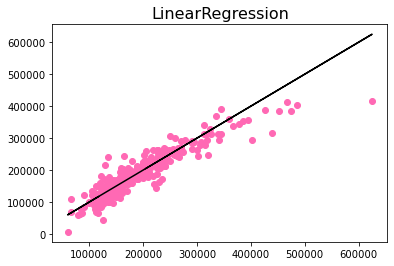

In [116]:
plt.scatter(x=ytest,y=pred_test,color="hotpink")
plt.plot(ytest,ytest,color="k")
plt.title('LinearRegression',size=16)
plt.show()